In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_income = pd.read_csv('adult.csv')

In [3]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df_income.shape

(48842, 15)

In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df_income.replace('?',np.nan,inplace=True)

In [7]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df_income.dropna(inplace=True)

In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [10]:
df_income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
def impute_age(age):
    if((age>15) & (age<=30)):
        return 1
    elif((age>30) & (age<=45)):
        return 2
    elif((age>45) & (age<=60)):
        return 3
    elif((age>60) & (age<=75)):
        return 4
    else:
        return 5

df_income.age = df_income.age.apply(impute_age)

df_income.age.value_counts()

2    17727
1    14260
3    10387
4     2579
5      269
Name: age, dtype: int64

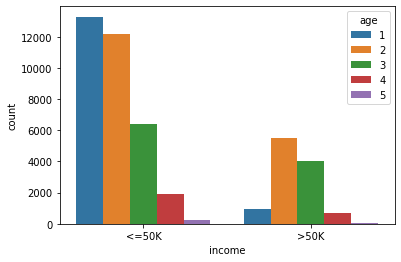

In [13]:
sns.countplot(data=df_income,x='income',hue='age')

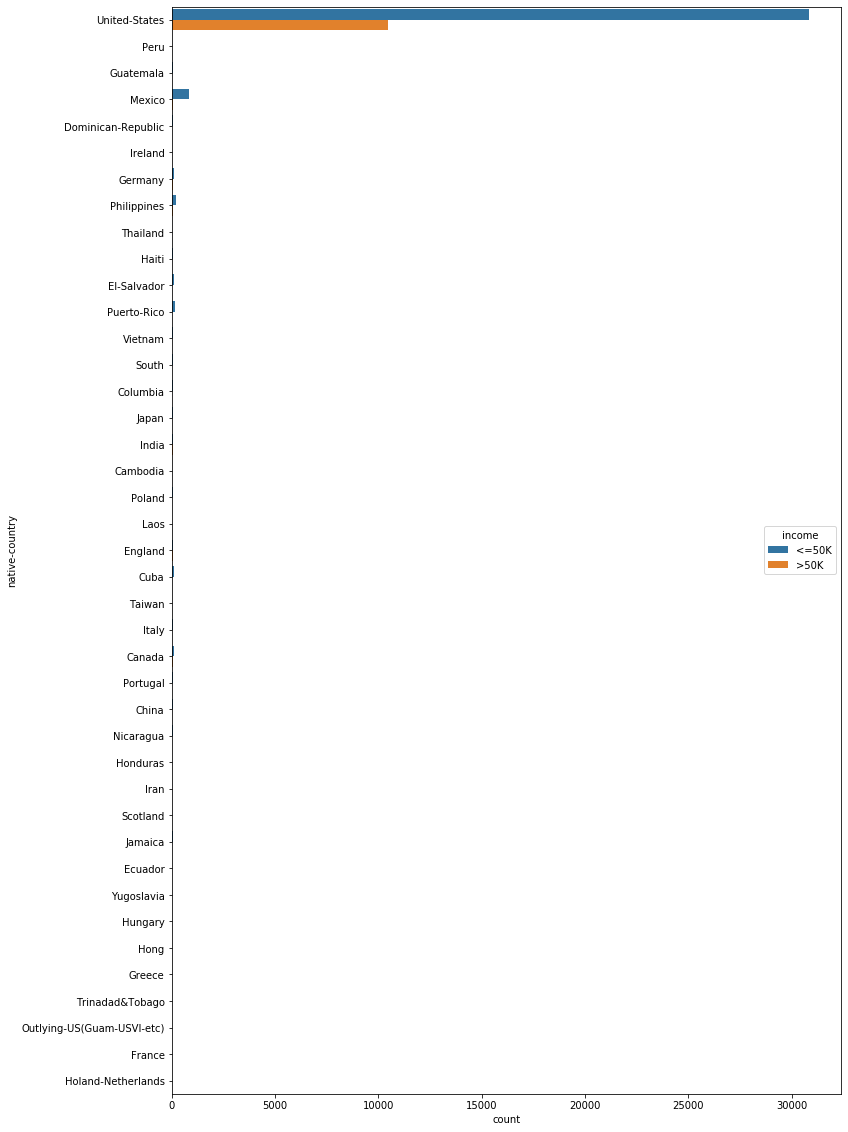

In [14]:
plt.figure(figsize=(12,20))
sns.countplot(data=df_income,y='native-country',hue='income')

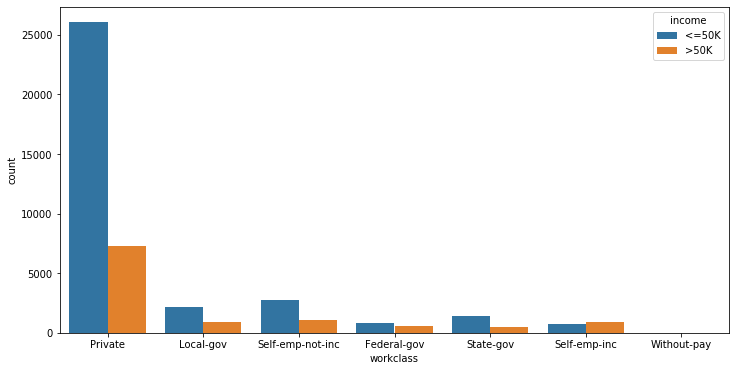

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_income,x='workclass',hue='income')

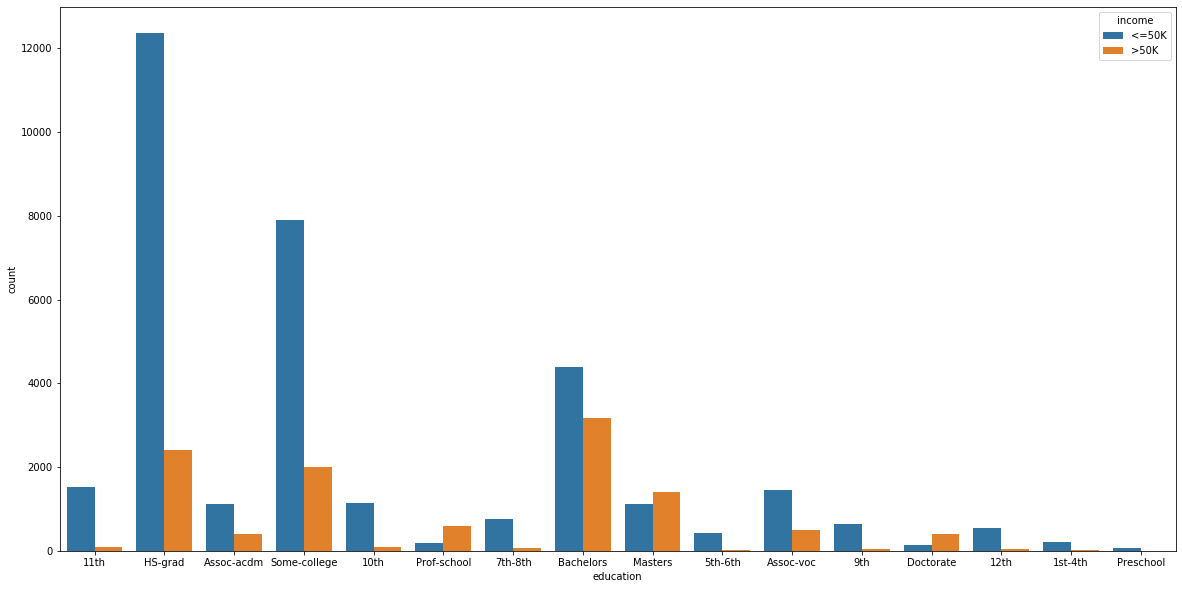

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_income,x='education',hue='income')

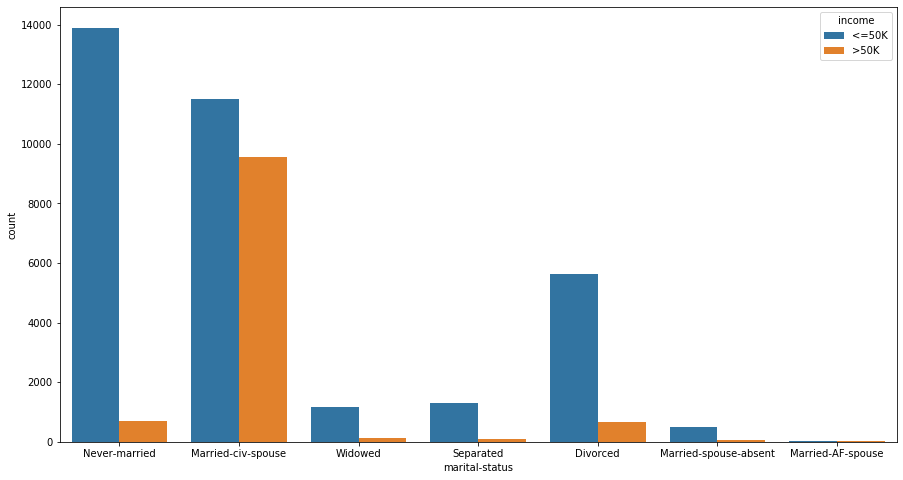

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_income,x='marital-status',hue='income')

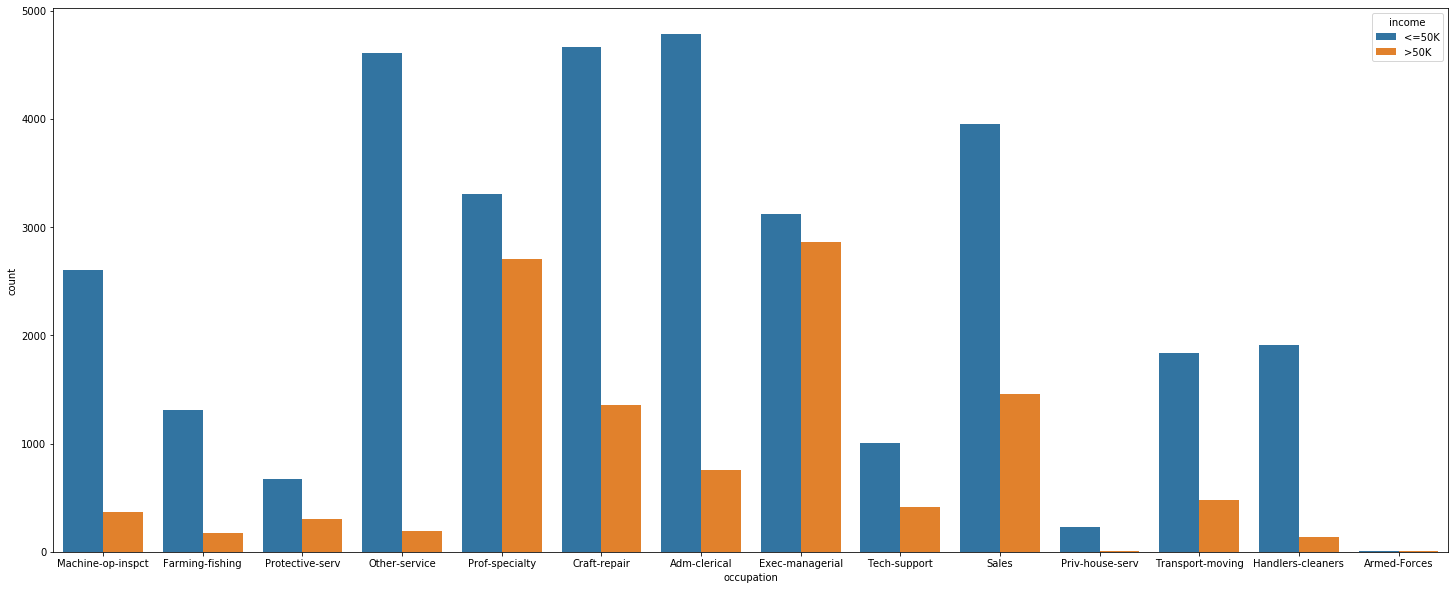

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(data=df_income,x='occupation',hue='income')

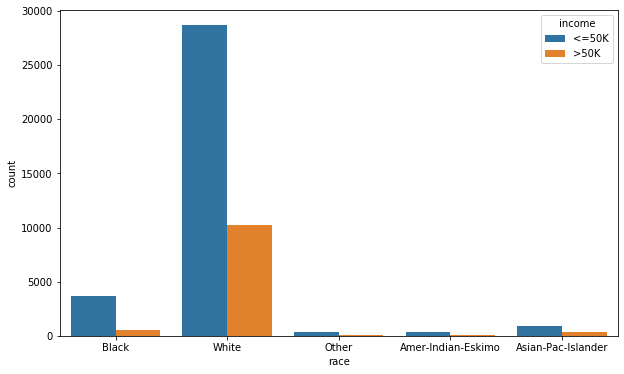

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_income,x='race',hue='income')

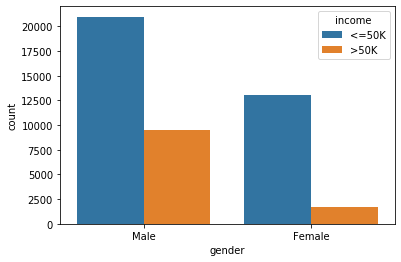

In [21]:
sns.countplot(data=df_income,x='gender',hue='income')

In [22]:
from sklearn.preprocessing import LabelEncoder

Labelenc_workclass = LabelEncoder()
df_income['workclass'] = Labelenc_workclass.fit_transform(df_income['workclass'])

Labelenc_education = LabelEncoder()
df_income['education'] = Labelenc_education.fit_transform(df_income['education'])

Labelenc_marital_status = LabelEncoder()
df_income['marital-status'] = Labelenc_marital_status.fit_transform(df_income['marital-status'])

Labelenc_occupation = LabelEncoder()
df_income['occupation'] = Labelenc_occupation.fit_transform(df_income['occupation'])

Labelenc_relationship = LabelEncoder()
df_income['relationship'] = Labelenc_relationship.fit_transform(df_income['relationship'])

Labelenc_race = LabelEncoder()
df_income['race'] = Labelenc_race.fit_transform(df_income['race'])

Labelenc_gender = LabelEncoder()
df_income['gender'] = Labelenc_gender.fit_transform(df_income['gender'])

Labelenc_native_country = LabelEncoder()
df_income['native-country'] = Labelenc_native_country.fit_transform(df_income['native-country'])

Labelenc_income = LabelEncoder()
df_income['income'] = Labelenc_income.fit_transform(df_income['income'])

In [23]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null int32
fnlwgt             45222 non-null int64
education          45222 non-null int32
educational-num    45222 non-null int64
marital-status     45222 non-null int32
occupation         45222 non-null int32
relationship       45222 non-null int32
race               45222 non-null int32
gender             45222 non-null int32
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null int32
income             45222 non-null int32
dtypes: int32(9), int64(6)
memory usage: 5.2 MB


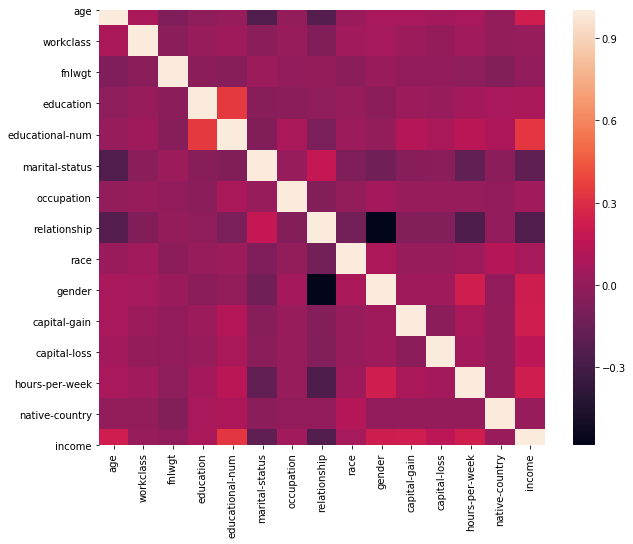

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df_income.corr())

In [25]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

st_scaler.fit(df_income.drop('income',axis=1))

scaled_features = st_scaler.transform(df_income.drop('income',axis=1))

In [26]:
X = pd.DataFrame(scaled_features,columns=df_income.columns[:-1])

In [27]:
y = df_income['income']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10131
           1       0.59      0.57      0.58      3436

    accuracy                           0.79     13567
   macro avg       0.72      0.72      0.72     13567
weighted avg       0.79      0.79      0.79     13567



In [33]:
print(confusion_matrix(y_test,y_pred))

[[8756 1375]
 [1482 1954]]


In [34]:
error_rate=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i!=y_test))

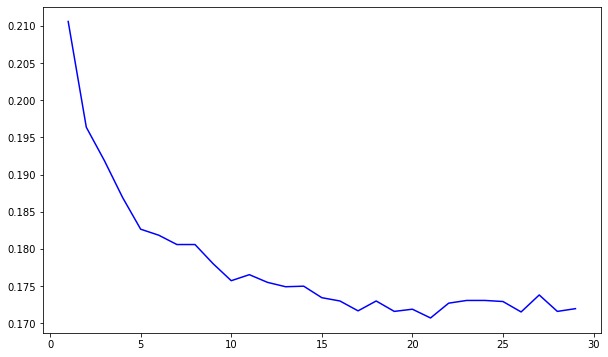

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue')

In [38]:
knn_new = KNeighborsClassifier(n_neighbors=10)
knn_new.fit(X_train,y_train)
y_pred_new = knn_new.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10131
           1       0.71      0.52      0.60      3436

    accuracy                           0.82     13567
   macro avg       0.78      0.72      0.74     13567
weighted avg       0.81      0.82      0.81     13567



In [40]:
print(confusion_matrix(y_test,y_pred_new))

[[9409  722]
 [1662 1774]]
